In [5]:
!pip install astropy

Der Befehl "pip" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def open_and_display(filepath, export=False):
    with fits.open(filepath) as hdul:
        # Display the FITS file structure
        header = hdul[0].header
        # Extract the image data (usually in the first HDU)
        image_data = hdul[0].data
        shape = image_data.shape

    if export:
        # Display and Import
        dpi = 100
        plt.figure(figsize=(round(shape[0]/dpi), round(shape[1]/dpi)))
        plt.imshow(image_data, cmap='gray', origin='lower')
        plt.axis('off')  # Hide the axis
        plt.savefig(os.path.basename(filepath).replace('.fits', '.png'), dpi=dpi, bbox_inches='tight', pad_inches=0)
        plt.close()
    else:
        #plt.imshow(image_data, cmap='gray')
        #plt.colorbar()
        #plt.title(f'{os.path.basename(filepath)}')
        #plt.show()
        pass
    return header

def traverse_folder(folder):
    folders = [f'{folder}/{f}' for f in os.listdir(folder) if os.path.isdir(f'{folder}/{f}')]
    images = [f'{folder}/{f}' for f in os.listdir(folder) if f.endswith('.fits')]
    for folder in folders:
        images.append(traverse_folder(folder))
    return images

def find_imagepaths(file_list):
    for index, elm in enumerate(file_list):
        if isinstance(elm, list):
            yield from find_imagepaths(elm)
        else:
            if index == 0:
                folder = '/'.join(elm.split('/')[0:-1])
                print(f'starting a new folder: {folder}')
            yield elm

CURRENT_DIR = 'D:/astro_images/tiles'
FILEPATHS_IMAGES = traverse_folder(CURRENT_DIR)

In [3]:
def __main_():
    all_image_filepaths = [filepath for filepath in find_imagepaths(FILEPATHS_IMAGES) if 'sci' in filepath] #only sci images
    #print(all_image_filepaths)
    n_of_images = 10
    indices = np.random.randint(0, len(all_image_filepaths), size=(n_of_images))
    headers = []
    for filepath in all_image_filepaths:
        headers.append(open_and_display(filepath, export=False))
    return headers
        
headers = __main_()

starting a new folder: D:/astro_images/tiles/drz-sci
starting a new folder: D:/astro_images/tiles/drz-wht


In [4]:
import pandas as pd

columns = []
for header in headers:
    columns.extend([column for column in header])

columns = set(columns)

data = {}
for header in headers:
    for column in columns:
        if not column in data:
            data[column] = []
        if column in header:
            data[column].append(header[column])
        else:
            data[column].append(np.nan)

data = pd.DataFrame(data)
data.to_csv('headers_sci_images.csv', index=False)

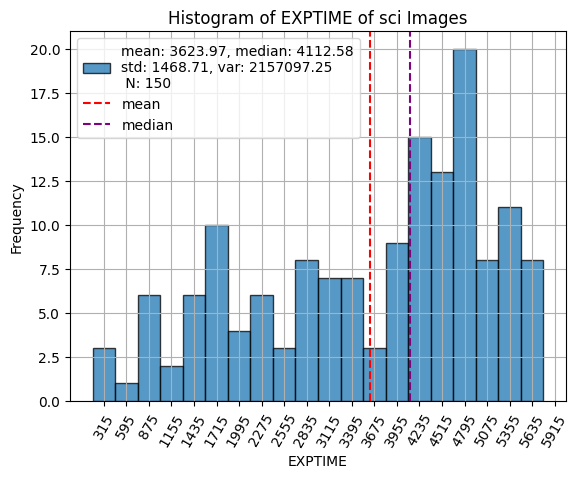

In [5]:
mean = data['EXPTIME'].mean()
median = data['EXPTIME'].median()
std = data['EXPTIME'].std()
var = data['EXPTIME'].var()

rotation = 60
bins = 20
label = f'mean: {round(mean, 2)}, median: {round(median, 2)}\nstd: {round(std, 2)}, var: {round(var, 2)}\n N: {len(data)}'

counts, bins_edges, patches = plt.hist(data['EXPTIME'], bins=20, density=False, alpha=0.75, edgecolor='black', label=label)
xticks = np.linspace(bins_edges.min(), bins_edges.max(), bins+1)
diff = (xticks[1] - xticks[0])/2
plt.xticks(np.linspace(bins_edges.min() + diff, bins_edges.max() + diff, bins+1), rotation=rotation)
plt.grid()
plt.axvline(mean, color='r', linestyle='--', label='mean')
plt.axvline(median, color='purple', linestyle='--', label='median')
plt.legend(loc='upper left')
plt.xlabel('EXPTIME')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.title('Histogram of EXPTIME of sci Images')
plt.savefig('histogram_exp_sci.png', dpi=100)
plt.show()
